<a href="https://colab.research.google.com/github/pedro162/computer_vision/blob/main/computer_vision_detections_of_gescture_and_actions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Points detections

In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


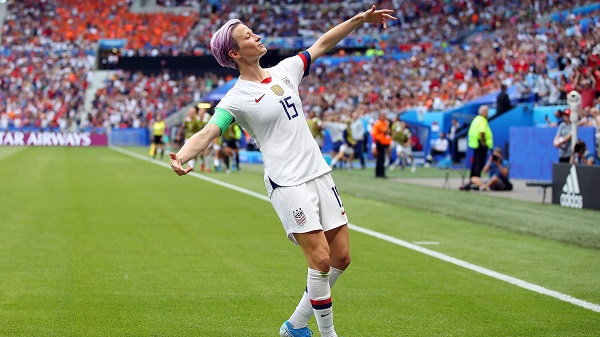

In [3]:
image = cv2.imread("/content/drive/MyDrive/arquivos_curos_visao_computacional/drive-download-20230813T171824Z-001/Images/megan.jpg")
cv2_imshow(image)

In [4]:
image.shape

(337, 600, 3)

In [6]:
337*600*3

606600

In [7]:
type(image)

numpy.ndarray

In [8]:
blob_image = cv2.dnn.blobFromImage(image=image, scalefactor=1.0/255, size=(image.shape[1], image.shape[0]))

In [9]:
blob_image.shape #bach

(1, 3, 337, 600)

In [10]:
type(blob_image)

numpy.ndarray

In [11]:
cv2_imshow(blob_image[0])

##Loading pre-trained neural network


*   Caffe Deep Learning framework: https://caffe.berkeleyvision.org



In [12]:
prototxt = "/content/drive/MyDrive/arquivos_curos_visao_computacional/drive-download-20230813T171824Z-001/Weights/pose_deploy_linevec_faster_4_stages.prototxt"
weight = "/content/drive/MyDrive/arquivos_curos_visao_computacional/drive-download-20230813T171824Z-001/Weights/pose_iter_160000.caffemodel"

In [13]:
network = cv2.dnn.readNetFromCaffe(prototxt, weight)

In [14]:
network.getLayerNames()

('conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'pool1_stage1',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'pool2_stage1',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_4',
 'relu3_4',
 'pool3_stage1',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3_CPM',
 'relu4_3_CPM',
 'conv4_4_CPM',
 'relu4_4_CPM',
 'conv5_1_CPM_L1',
 'relu5_1_CPM_L1',
 'conv5_1_CPM_L2',
 'relu5_1_CPM_L2',
 'conv5_2_CPM_L1',
 'relu5_2_CPM_L1',
 'conv5_2_CPM_L2',
 'relu5_2_CPM_L2',
 'conv5_3_CPM_L1',
 'relu5_3_CPM_L1',
 'conv5_3_CPM_L2',
 'relu5_3_CPM_L2',
 'conv5_4_CPM_L1',
 'relu5_4_CPM_L1',
 'conv5_4_CPM_L2',
 'relu5_4_CPM_L2',
 'conv5_5_CPM_L1',
 'conv5_5_CPM_L2',
 'concat_stage2',
 'Mconv1_stage2_L1',
 'Mrelu1_stage2_L1',
 'Mconv1_stage2_L2',
 'Mrelu1_stage2_L2',
 'Mconv2_stage2_L1',
 'Mrelu2_stage2_L1',
 'Mconv2_stage2_L2',
 'Mrelu2_stage2_L2',
 'Mconv3_stage2_L1',
 'Mrelu3_stage2_L1',
 'Mconv3_stage2_L2',
 'Mrelu3_stage2_L2',
 'Mconv4_stage2_L1',
 'Mrelu4_sta

In [15]:
len(network.getLayerNames())

127

##Body keypoint prediction

In [17]:
network.setInput(blob_image)
output = network.forward()

In [18]:
output.shape

(1, 44, 43, 75)

In [19]:
width_position = output.shape[3]
height_position = output.shape[2]

In [20]:
width_position, height_position

(75, 43)

In [26]:
point_numbers = 15
points = []
threshold = 0.1

for i in range(point_numbers):
  #print(i)
  confidence_map = output[0, i,:,:]
  #print(confidence_map)
  #print(len(confidence_map))
  _,confidece,_, point = cv2.minMaxLoc(confidence_map)
  print(confidece)
  print(point)
  x = int((image.shape[1] * point[0]) / width_position)
  y = int((image.shape[0] * point[1]) / height_position)
  #print(x,y)
  if confidece > threshold:
    cv2.circle(image, (x, y), 5, (0,255,0), thickness=-1)
    cv2.putText(image, '{}'.format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
    points.append((x,y))
  else:
    points.append(None)

0.7554596662521362
(28, 3)
0.9123879075050354
(31, 8)
0.6697722673416138
(29, 12)
0.7503767609596252
(26, 16)
0.7385097146034241
(22, 19)
0.7186093330383301
(35, 8)
0.7753999829292297
(40, 5)
0.7418547868728638
(45, 2)
0.5037320256233215
(36, 23)
0.7334719300270081
(40, 32)
0.6221848130226135
(40, 41)
0.5226558446884155
(39, 21)
0.94032222032547
(42, 32)
0.7596977949142456
(37, 39)
0.7704717516899109
(35, 16)


In [27]:
points

[(224, 23),
 (248, 62),
 (232, 94),
 (208, 125),
 (176, 148),
 (280, 62),
 (320, 39),
 (360, 15),
 (288, 180),
 (320, 250),
 (320, 321),
 (312, 164),
 (336, 250),
 (296, 305),
 (280, 125)]

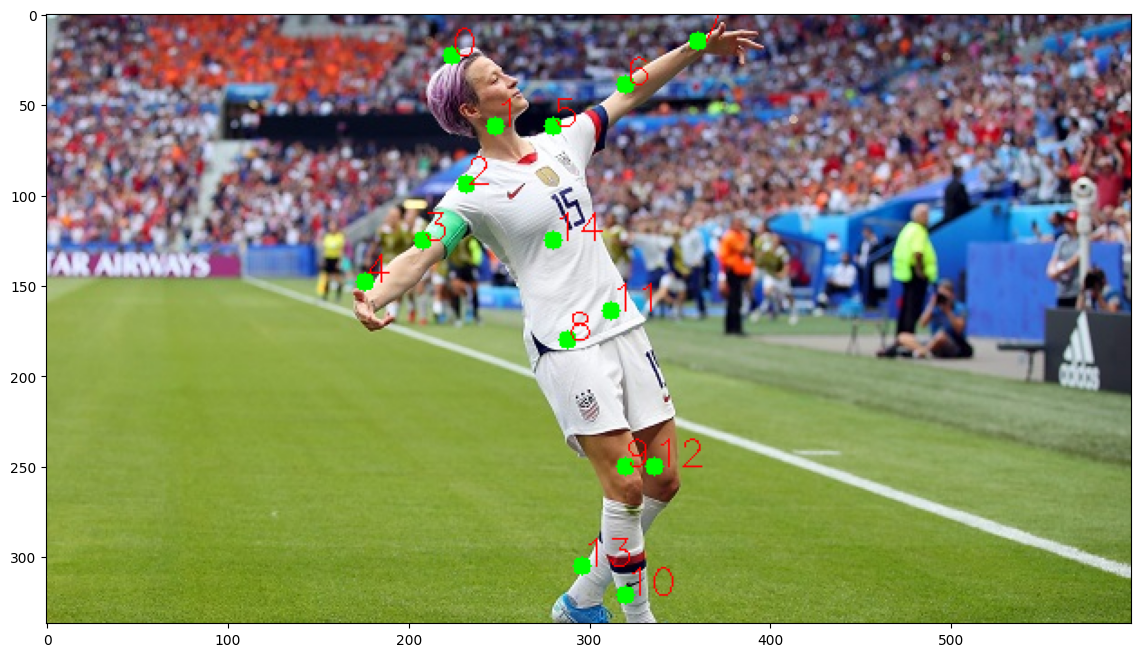

In [31]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))